# Predvidanje uspijeha studenata
### Analiza seta, izrada te uporaba modela baziranog na podatcima o studentima
Tomislav Kucar, kucar.tomislav@gmail.com
## Priprema okruzenja
Potreban nam je IPython (Jupyter), te moduli `pandas`, `matplotlib`, `scipy`, `seaborn`

## Kontrola kvalitete i statistička analiza uzorka podataka

Raditi cemo na datasetu student-por.csv (Portuguese language course) posto on
ima 650 stavki dok student-mat.csv ima samo 396, od cega je 382 studenata
zajednicko izmedu setova podataka. Bitno je znati kako studenti u datasetu
pohadaju 9 godina osnovnog skolovanja, nakon cega slijedi 3 godine
sekundarnog obrazovanja. Ocjene za tri godine sekundarnog obrazovanja oznacene su
kao G1, G2 i G3.

Za pocetak cemo ucitati podatke iz datoteke i priazati prvih 3 zapisa za studente svake skole,
"GP" - Gabriel Pereira i "MS" - Mousinho da Silveira.

In [54]:
%matplotlib inline

import pandas as pd

path = 'https://frainfreeze.github.io/studying/university/12032-DecisionMakingSuportSystems/project/dataset/student-por.csv'
df = pd.read_csv(path, sep=';')
df.groupby('school').head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
423,MS,F,16,U,GT3,T,1,3,at_home,other,...,4,3,3,1,3,5,11,10,11,11
424,MS,F,16,R,GT3,T,2,2,other,other,...,4,4,4,1,1,5,0,12,12,12
425,MS,F,15,R,GT3,T,1,1,at_home,services,...,4,1,3,1,1,2,6,10,10,10


Nadalje moramo provjeriti imamo li nedostajucih vrijednosti.

In [2]:
df.isnull().values.any()

False

Provjerom otkrivamo kako nema nedostajućih vrijednosti.
Dataset je potpun. U slucaju da su postojale nedostajuce
vrijednosti rekodirali bi ih, npr .null. -> "missing", posto
nam nedostajuce vrijednosti takoder mogu sluziti kao podatak,
za sto bi iskoristili bi jednu od prikladnih metoda za
nedostajuce vrijednosti, no kako nemamo nedostajucih vrijednosti
u datasetu nastavljamo s analizom.

Da bismo bolje upoznali obiljezja varijabli i opcenito se bolje 
upoznali sa setom podataka racunamo temeljna statisticka obiljezja
te iscrtavamo historgrame za podatke:

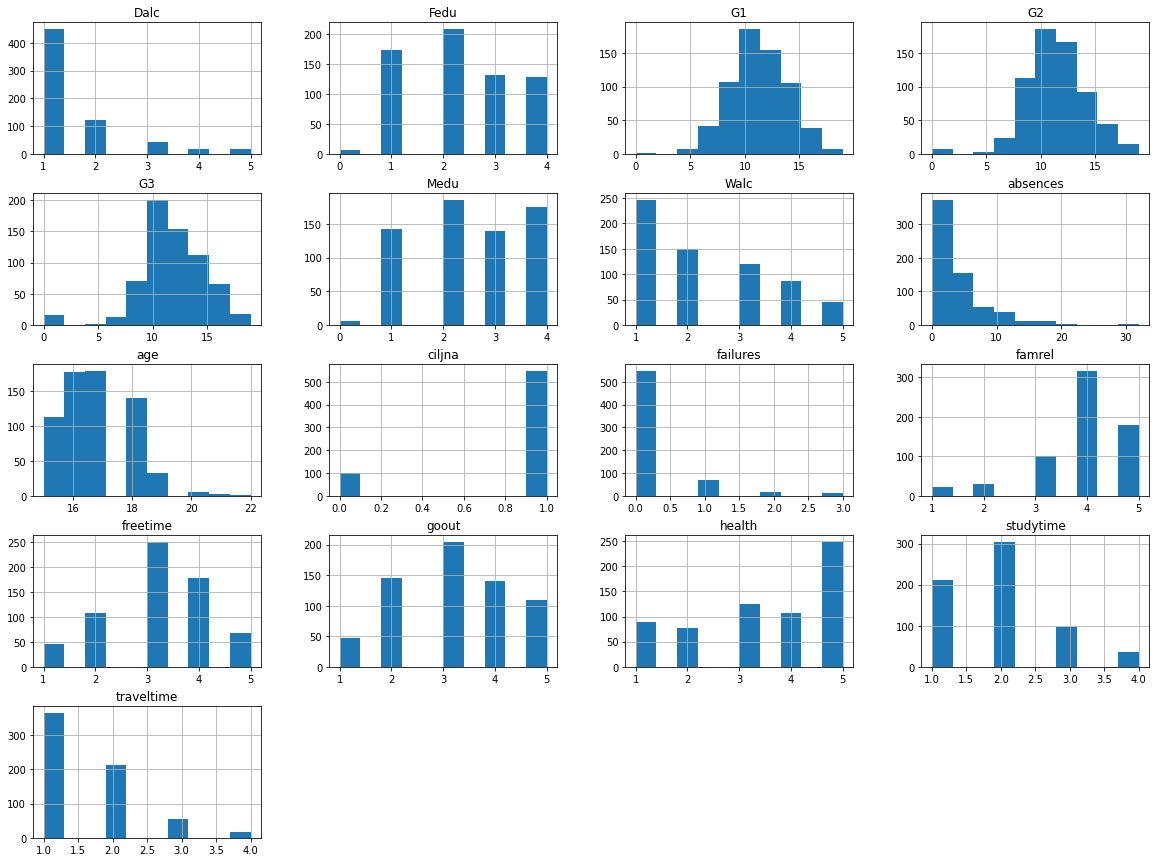

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,ciljna
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,0.845917
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,0.361307
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,1.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,1.000000


In [65]:
import matplotlib.pyplot as plt

df.hist(figsize=(20, 15))
plt.show()
df.describe()

Vidimo kako se radi o kompaktnoj distribuciji (jako niske standardne devijacije, 
i malena razlika izmedu min i max).

Dalc prestavlja unos alkohola tjekom radnog tjedna (1 jako malo, 5 jako puno),
vidimo kako jako malen studenata pije vece kolicine alkohola tjekom tjedna.
Wikiendom se broj studenata koji pije vecu kolicinu alkohola znatno povecava
(Walc, 1 jako malo, 5 jako puno.)

Fedu i Medu predstavljaju ocevu i majcinu razinu edukacije, koje su u ovom setu
podataka slicne, uz nesto veci stupanj vise edukacije oceva.

G1, G2, G3 su ocjene iz portugalskog na skali od 0 do 20, gdje je G1 first 
period grade, G2 second period grade i G3 final grade.

Polje absences predstavlja broj izostanaka iz skole (0 do 93)

Failures je broj proslih padova predmeta (n ako je 1 <= n < 3, inace 4)

famrel, freetime, goout i health predstavljaju odnose sa obitelji, kolicinu 
slobodnog vremena nakon skole, frekvenciju izlazaka sa prijateljima te trenutno 
stanje zdravlja, gdje je 1 jako nisko, 5 jako visoko.

Studytime i traveltime prestavljaju vrijeme potroseno na ucenje te na putovanje 
do skole, gdje je za study time imamo 1 - <2 sata, 2 - 2 do 5 sati, 3 - 5 do 10
sati, i 4 - >10 ucenja, te za traveltime 1 - <15 min., 2 - 15 do 30 min., 
3 - 30 min. do 1 sat, i 4 - >1 sata putovanja.

Zanima nas i zaobljenost te simetricnost distribucije:

In [4]:
df.kurt()

age           0.071509
Medu         -1.260619
Fedu         -1.109241
traveltime    1.108865
studytime     0.037846
failures      9.824409
famrel        1.348973
freetime     -0.396959
goout        -0.865454
Dalc          4.349297
Walc         -0.770689
health       -1.121175
absences      5.781078
G1            0.036638
G2            1.662465
G3            2.712204
dtype: float64

In [5]:
df.skew()

age           0.416795
Medu         -0.029950
Fedu          0.215343
traveltime    1.247648
studytime     0.699619
failures      3.092699
famrel       -1.105934
freetime     -0.181277
goout        -0.008580
Dalc          2.141913
Walc          0.635904
health       -0.500656
absences      2.020694
G1           -0.002774
G2           -0.360283
G3           -0.912909
dtype: float64

Budući da želimo prepoznati studente koji ce poloziti zavrsni ispit kreirat ćemo
ciljnu varijablu koja ima vrijednost `1` u svakom retku koji se odnosi na ocjene
zavrsne godine (G3) sa bodovima vecim od 10 i vrijednost `0` u svim ostalim retcima.

In [57]:
df['ciljna'] = np.where(df['G3'] >=10, 1, 0)
df.groupby('ciljna').first()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
ciljna,,,,,,,,,,,,,,,,,,,,,
0,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,2,8,8,7
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11


Nadalje zelimo izracunati i z vrijednosti, primjer za `age`:

In [58]:
import numpy as np
((df['age']-np.mean(df['age']))/np.std(df['age'])).head(5)

0    1.031695
1    0.210137
2   -1.432980
3   -1.432980
4   -0.611422
Name: age, dtype: float64

Z vrijednosti za sve brojcane stupce mozemo izracunati i pomocu zscore
funcije iz scipy paketa tako da cemo koristiti tu funkciju za normiranje
podataka:

In [96]:
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_norm = df[numeric_cols].apply(zscore)
df_norm.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,ciljna
0,-0.730944,-0.833377,1.031695,0.660182,-0.648175,-2.666927,1.310216,1.540715,0.576718,0.083653,...,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470,-0.195820,-0.280658,0.42679
1,-0.730944,-0.833377,0.210137,0.660182,-0.648175,0.374963,-1.336039,-1.188832,-0.760032,0.083653,...,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570,-0.195820,-0.280658,0.42679
2,-0.730944,-0.833377,-1.432980,0.660182,1.542792,0.374963,-1.336039,-1.188832,-0.760032,0.083653,...,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064,0.491137,0.029116,0.42679
3,-0.730944,-0.833377,-1.432980,0.660182,-0.648175,0.374963,1.310216,-0.278983,-0.760032,1.290114,...,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.948153,0.834615,0.648663,0.42679
4,-0.730944,-0.833377,-0.611422,0.660182,-0.648175,0.374963,0.428131,0.630866,-0.760032,0.083653,...,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,-0.145481,0.491137,0.338889,0.42679


Vrijednosti cemo grupirati kategorizirane u razrede <-3 , (-3 do 3), >3

In [60]:
limit = -3.402823*10**38
limit_up = 3.402823*10**38
df2 = df_norm.copy()
df2['bin'] = pd.cut(df2['age'], [limit, -3, 3, limit_up], labels=['<-3', '-3 to 3', '>3'])
df2.groupby('bin').head(3)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,ciljna,bin
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470,-0.195820,-0.280658,0.426790,-3 to 3
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570,-0.195820,-0.280658,0.426790,-3 to 3
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064,0.491137,0.029116,0.426790,-3 to 3
279,4.317929,0.428131,-1.188832,-0.760032,-1.122808,4.686612,1.119748,0.780478,1.544950,3.784879,2.119051,-1.754987,1.798619,-1.603659,-1.226254,-2.139298,-2.343075,>3
407,3.496371,1.310216,1.540715,-0.760032,1.290114,2.999640,-0.974536,-0.171647,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,-0.874570,0.147659,0.029116,0.426790,>3
413,3.496371,-1.336039,-1.188832,0.576718,0.083653,2.999640,1.119748,-0.171647,-0.157380,3.784879,-0.218508,0.320930,3.739453,-0.874570,-0.539298,-0.590431,0.426790,>3


te pogledati korelaciju sa ciljnom varijablom:

Medu          0.144803
Fedu          0.146249
traveltime   -0.057869
studytime     0.165111
failures     -0.380237
famrel        0.044987
freetime     -0.093349
goout        -0.067241
Dalc         -0.123627
Walc         -0.116249
health       -0.009979
absences     -0.087483
G1            0.563070
G2            0.592251
G3            0.663157
ciljna        1.000000
Name: ciljna, dtype: float64

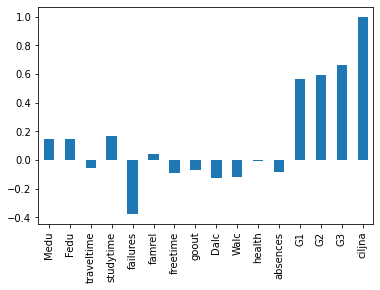

In [10]:
corrs_norm = df2[df2.columns[1:]].corr()['ciljna'][:]
corrs_norm.plot.bar();
corrs_norm

Ovom analizom zelimo predvjeti G3 (final grade) te otkriti korelaciju zavrsne
ocjene sa ostalim varijablama. Primjerice, utjece li konzumacija alkohola, broj izlazaka
sa prijateljima, broj izostanaka ili zdravlje na finalne rezultate?

Druga zanimljiva pitanja su utjece li vrijeme putovanja do skole, romanticna
veza ili odnos sa clanovima obitelji na broj izostanaka?

Za vizualni prikaz interesantan nam je i heatmap korelacijske matrice:

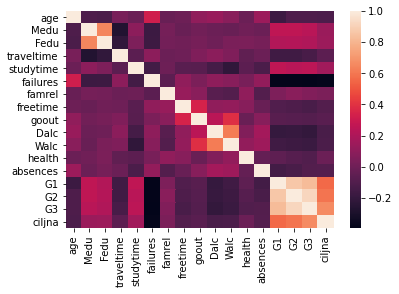

In [62]:
import seaborn as sns

corr = df_norm.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns); #,vmin=-1,vmax=1)

te scatter matrix:

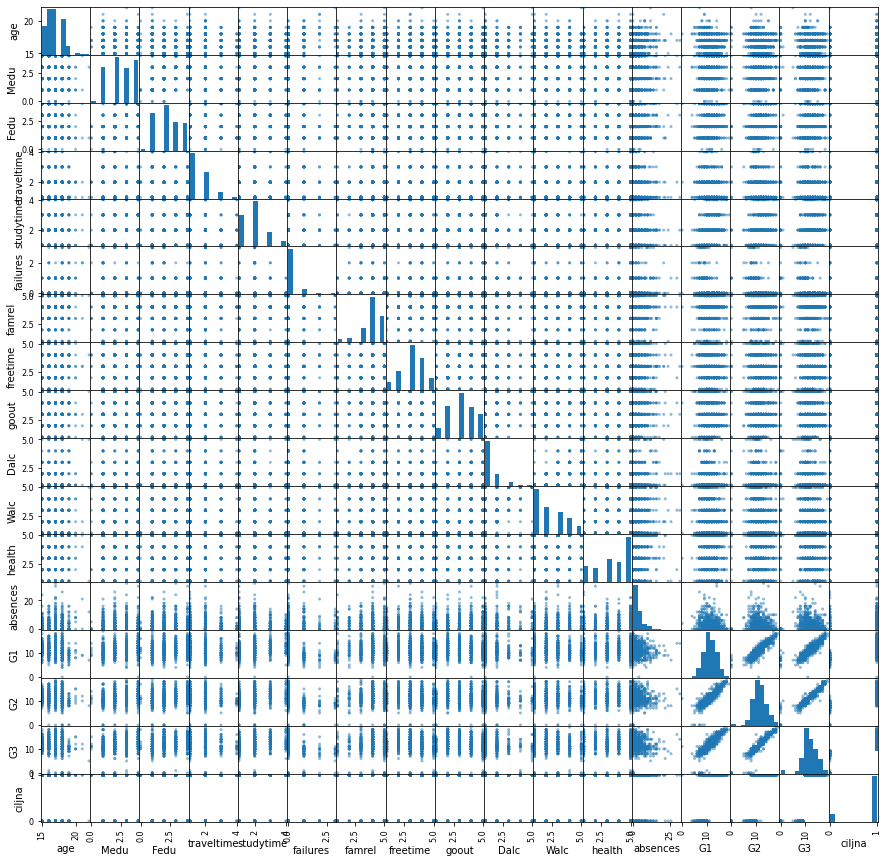

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15, 15))
plt.show()

Iz grafova jasno vidimo negativnu korelaciju failures (padova) sa ocjenama po razredima
(G1, G2, G3).

Ako zasebno proucimo grafove odnosa proslih ocjena i finalnog rezultata:

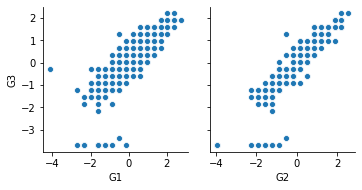

In [63]:
sns.pairplot(df_norm, x_vars=["G1", "G2"], y_vars=["G3"]);

mozemo potvrditi snaznu korelaciju izmedu proslih rezultata i zavrsne ocjene.

Takoder vidimo i korelaciju stupnja edukacije oca i majke, te vremena ucenja, sa finalnom ocjenom:

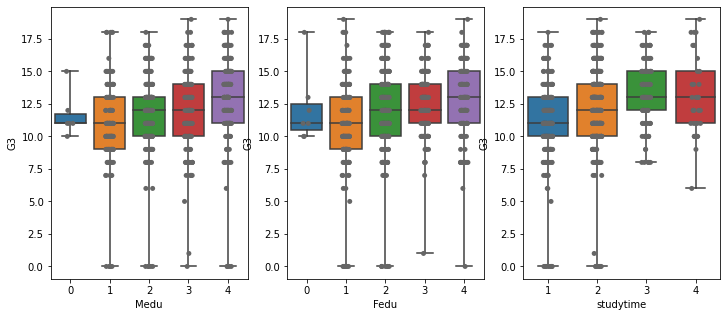

In [66]:
f, axes = plt.subplots(1,3, figsize=(12,5))
sns.boxplot(x="Medu", y="G3", data=df, whis=np.inf, ax=axes[0]);
sns.stripplot(x="Medu", y="G3", data=df, color=".4", ax=axes[0]);
sns.boxplot(x="Fedu", y="G3", data=df, whis=np.inf, ax=axes[1]);
sns.stripplot(x="Fedu", y="G3", data=df, color=".4", ax=axes[1]);
sns.boxplot(x="studytime", y="G3", data=df, whis=np.inf, ax=axes[2]);
sns.stripplot(x="studytime", y="G3", data=df, color=".4", ax=axes[2]);

Vrijeme ucenja poblize:

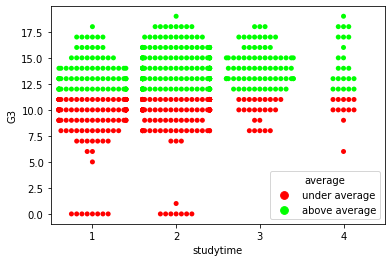

In [15]:
ave = sum(df.G3)/float(len(df))
df['ave_line'] = ave
df['average'] = ['above average' if i > ave else 'under average' for i in df.G3]
sns.swarmplot(x='studytime', y = 'G3', hue = 'average',data= df,
              palette={'above average':'lime', 'under average': 'red'});

Jasno vidimo kako je u slucaju ucenja vise jednako bolje, gdje je 5 - 10 sati
ucenja zlatna sredina (sjetimo se da 3 za study time predstavlja 5 - 10 sati
ucenja, a 4 - 10 ili vise sati).

Promotrimo dalje odnos izostanaka i toga jeli je student platio dodatne satove
u odnosu na finalnu ocjenu i ciljnu varijablu:

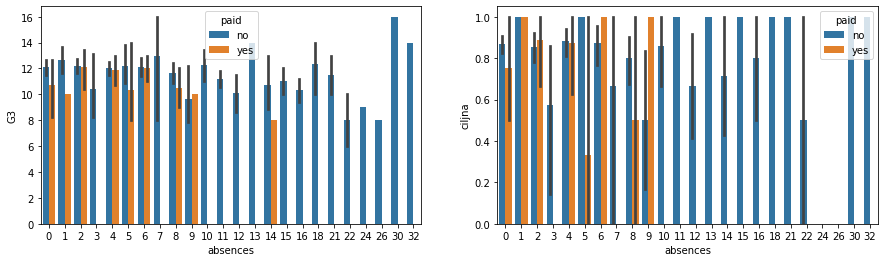

In [67]:
f, axes = plt.subplots(1,2, figsize=(15,4))
sns.barplot('absences', 'G3', hue='paid', data = df, ax=axes[0]);
sns.barplot('absences', 'ciljna', hue='paid', data = df, ax=axes[1]);

Jasno vidimo kako studenti koji placaju dodatne satove u pravilu izostaju rjede i
imaju nesto visu zavrsnu ocjenu.

## IV, WoE izracuni

- Izračunati IV, WoE za svaku varijablu i prikazati u Jupyter Notebooku
- Izdvojiti varijable sa najjačim IV-om i prikazati grafički WoE graf za sve najjače varijable
- Grupirati razrede po kriteriju WoE za najjače varijable
- Objasniti što ste spoznali temeljem ove analize (profili, uzroci, uzročno posljedične veze)
- Predložite kako biste riješili problem vezano uz vaš skup podataka temeljem  IV, WoE analize (što bi trebalo mijenjati, raditi drugačije, gdje je problem uzrok problema, koji su rizični profili)

## Logistička regresija


Pripremimo podatke enkodiranjem u binarne vrijednosti:

In [164]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
cols = df.columns[df.dtypes==object].tolist()
for col in cols:
    n = len(df[col].unique())
    if (n == 2):
        df[col] = pd.get_dummies(df[col], drop_first=True)
df_d = pd.get_dummies(df)
df_d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


Pogledajmo nove korelacije:

In [165]:
new_corr=df_d.corr()
new_corr['G3'].sort_values(ascending=False).head(10)

G3                   1.000000
G2                   0.918548
G1                   0.826387
ciljna               0.663157
higher               0.332172
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
reason_reputation    0.170944
address              0.167637
Name: G3, dtype: float64

Zanimaju nas samo najbitinije znacajke, pa cemo maknuti one koje imaju maleni utjecaj na finalnu ocjenu:

In [115]:
df_d=df_d.drop(['G3','failures','school','Dalc','Walc','Mjob_at_home','reason_other','sex','traveltime','freetime','age', 'health','reason_course', 'absences', 'romantic', 'goout', 'nursery', 'Pstatus', 'guardian_mother', 'Fjob_other', 'Fjob_at_home', 'Fjob_services', 'paid', 'Mjob_other', 'schoolsup', 'guardian_other'],axis=1)
df_d.head()

,address,famsize,Medu,Fedu,studytime,famsup,activities,higher,internet,famrel,...,G2,ciljna,Mjob_health,Mjob_services,Mjob_teacher,Fjob_health,Fjob_teacher,reason_home,reason_reputation,guardian_father
0,1,0,4,4,2,0,0,1,0,4,...,11,1,0,0,0,0,1,0,0,0
1,1,0,1,1,2,1,0,1,1,5,...,11,1,0,0,0,0,0,0,0,1
2,1,1,1,1,2,0,0,1,1,4,...,13,1,0,0,0,0,0,0,0,0
3,1,0,4,2,3,1,1,1,1,3,...,14,1,1,0,0,0,0,1,0,0
4,1,0,3,3,2,1,0,1,0,4,...,13,1,0,0,0,0,0,1,0,1


Dalje moramo podjeliti podatke na one za treniranje modela i one za testiranje, uzeti cemo omjer 80/20:

In [153]:
from sklearn.model_selection import train_test_split

y=df_d.ciljna
x=df_d.drop('ciljna',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("train:",len(x_train),"test:",len(x_test))

train: 519 test: 130


Sada kada imamo podatke za treniranje primjeniti cemo algoritam za logisticku regresiju i provjeriti tocnost modela:

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print("Preciznost modela:", accuracy_score(y_test,predictions)*100)

Preciznost modela: 92.3076923076923


Model cemo spremiti u datoteku kako bi ga mogli kasnije ponovo iskoristiti za procjene:

In [121]:
import joblib
joblib.dump(lr, 'model.pkl')

['model.pkl']

Testirajmo:

In [154]:
import joblib
model = joblib.load(open('model.pkl', 'rb'))

data = {"address":"1","famsize":"0","Medu":"4","Fedu":"4","studytime":"2","famsup":"0","activities":"1","higher":"1","internet":"1","famrel":"3","G1":"17","G2":"18","Mjob_health":"0","Mjob_services":"0","Mjob_teacher":"1","Fjob_health":"0","Fjob_teacher":"1","reason_home":"1","reason_reputation":"0","guardian_father":"1"}
int_features = [int(value) for key, value in data.items()]
int_features
final_features = [np.array(int_features)]
prediction = model.predict(final_features)
print ("Pozitivna zavrsna ocjena." if prediction else "Negativna zavrsna ocjena.")

Pozitivna zavrsna ocjena.


## Aplikacija
Naposljetku zelimo primjeniti nas model u aplikaciji u koju korisnik moze unjeti podatke i dobiti procjenu.

Pokrenimo nasu aplikaciju:

In [161]:
from multiprocessing import Process, Queue
from flask import Flask, request
import joblib

app = Flask(__name__)
model = joblib.load(open('model.pkl', 'rb'))

@app.route("/", methods = ['GET', 'POST'])
def index():
    if request.method == 'POST':
        data = request.get_json(force=True)
        int_features = [int(value) for key, value in data.items()]
        int_features
        final_features = [np.array(int_features)]
        prediction = model.predict(final_features)
        return "Pozitivna zavrsna ocjena." if prediction else "Negativna zavrsna ocjena."
    return "Hello, word!"

def start_app():
    app.debug = True
    app.run(host='0.0.0.0',port=5005, debug=False)

queue = Queue()
server = Process(target=start_app)
server.start()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5005/ (Press CTRL+C to quit)


Posto nismo implementirali GUI sucelje aplikaciji cemo poslati nase podatke i dobiti odgovor pomocu curl komande:

In [158]:
!curl -d '{"address":"1","famsize":"0","Medu":"4","Fedu":"4","studytime":"2","famsup":"0","activities":"1","higher":"1","internet":"1","famrel":"3","G1":"17","G2":"18","Mjob_health":"0","Mjob_services":"0","Mjob_teacher":"1","Fjob_health":"0","Fjob_teacher":"1","reason_home":"1","reason_reputation":"0","guardian_father":"1"}' 0.0.0.0:5005

Pozitivna zavrsna ocjena.

Ukoliko nemamo curl instaliran ili dostupan isto mozemo napraviti i pomocu pythona:

In [159]:
import requests

data = {"address":"1","famsize":"0","Medu":"4","Fedu":"4","studytime":"2","famsup":"0","activities":"1","higher":"1","internet":"1","famrel":"3","G1":"17","G2":"18","Mjob_health":"0","Mjob_services":"0","Mjob_teacher":"1","Fjob_health":"0","Fjob_teacher":"1","reason_home":"1","reason_reputation":"0","guardian_father":"1"}
requests.post('http://0.0.0.0:5005', json=data).text

'Pozitivna zavrsna ocjena.'

Naposlijetku zelimo ugasiti flask server.

In [160]:
server.terminate()

## Literatura
- Goran Klepac, Sustavi potpore odlucivanju
- Visualizing the distribution of a dataset, [Seaborn](https://seaborn.pydata.org/tutorial/distributions.html)
- Visualizing statistical relationships, [Seaborn](http://seaborn.pydata.org/tutorial/relational.html)
- Visualisation, [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
- Exploring Distributions with Pandas and Seaborn, [Introduction to Data Science](https://sphinx-dat.readthedocs.io/en/latest/02-01-exploring-distributions.html)
- Replacing Variables by WoE (Weight of Evidence) in Logistic Regression, [Cross Validated](https://stats.stackexchange.com/questions/189568/replacing-variables-by-woe-weight-of-evidence-in-logistic-regression)
- Why do we calculate Information value?, [Cross Validated](https://stats.stackexchange.com/questions/93170/why-do-we-calculate-information-value)
-  Weight of Evidence (WOE) and Information Value (IV) Explained, [Listen Data](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html)
- P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.